In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


#input custom functions
from noten_data import noten_2010, noten_2011, noten_2012, noten_2013, noten_2014, noten_2015, noten_2016, noten_2017, noten_2018, noten_2019, noten_2020, noten_2021, noten_2022

/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  noten_data.iloc[:, 1:] = noten_data.iloc[:, 1:].apply(lambda x: x.str.replace('.', ''))
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:41: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  noten_data.iloc[:, 0:] = noten_data.iloc[:, 0:].astype(int)
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/noten_data.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treate

In [6]:
noten_concat = pd.concat([noten_2010, noten_2011, noten_2012,
                          noten_2013, noten_2014, noten_2015,
                          noten_2016, noten_2017, noten_2018,
                          noten_2019, noten_2020, noten_2021,
                          noten_2022
                          ], ignore_index=True)

In [7]:
noten_concat

,Federal States,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,year
0,BW,591,371,555,722,942,1141,1252,1514,1716,...,1900,1587,1213,851,447,142,19,3,1,2010-01-01
1,BY,353,343,446,665,747,963,1106,1362,1581,...,1369,1070,809,639,359,164,36,6,8,2010-01-01
2,BE,125,96,126,211,225,254,330,378,446,...,590,507,341,209,113,30,6,0,0,2010-01-01
3,BB,156,125,145,190,236,323,284,350,348,...,413,378,238,160,65,18,4,1,0,2010-01-01
4,HB,31,20,40,57,77,90,80,100,104,...,139,127,69,66,36,15,5,1,1,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,SL,138,57,83,81,100,94,118,131,133,...,110,83,57,40,12,4,0,0,0,2022-01-01
204,SN,542,266,388,477,486,571,624,640,680,...,265,162,97,32,16,3,0,0,0,2022-01-01
205,ST,176,100,132,151,172,194,179,216,237,...,170,119,63,41,1,0,0,0,0,2022-01-01
206,SH,224,129,178,197,239,305,346,364,409,...,488,382,293,210,108,41,23,1,3,2022-01-01


In [11]:
noten_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Federal States  208 non-null    object        
 1   1.0             208 non-null    int64         
 2   1.1             208 non-null    int64         
 3   1.2             208 non-null    int64         
 4   1.3             208 non-null    int64         
 5   1.4             208 non-null    int64         
 6   1.5             208 non-null    int64         
 7   1.6             208 non-null    int64         
 8   1.7             208 non-null    int64         
 9   1.8             208 non-null    int64         
 10  1.9             208 non-null    int64         
 11  2.0             208 non-null    int64         
 12  2.1             208 non-null    int64         
 13  2.2             208 non-null    int64         
 14  2.3             208 non-null    int64         
 15  2.4   

Short explanation of the describe measures:
- count: Indication of how many values are present in the columns (NaNs/missing values are not counted).
- mean: average value of the data
- std: standard deviation of the data
- min: the smallest value in the data set
- 25%: 25 % of the data are below this value
- 50%: 50% of the data are below this value. This value is called the median.
- 75%: 75% of the data are below this value
- max: the largest expression in the data set

In [8]:
noten_concat.describe()

,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,365.826923,229.673077,308.076923,383.514423,453.427885,538.019231,610.288462,688.024038,765.346154,848.283654,...,960.168269,869.331731,736.500000,567.264423,390.033654,206.341346,79.504808,18.524038,3.081731,2.557692
std,429.277113,250.901272,335.323874,411.335236,474.989504,565.334341,644.755883,722.596662,802.096658,902.334836,...,1082.999817,1009.282230,897.808706,728.912877,545.895722,316.725767,137.611404,35.987778,6.045564,4.825109
min,31.000000,20.000000,33.000000,43.000000,56.000000,60.000000,70.000000,68.000000,80.000000,97.000000,...,109.000000,89.000000,50.000000,33.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,112.750000,75.000000,103.250000,128.750000,157.250000,178.000000,205.000000,228.250000,253.750000,269.750000,...,227.250000,193.000000,150.000000,97.000000,50.750000,20.000000,5.000000,0.750000,0.000000,0.000000
50%,193.500000,131.000000,178.000000,215.000000,259.000000,305.500000,333.000000,379.000000,421.000000,457.000000,...,511.000000,459.500000,380.000000,290.500000,188.500000,91.000000,29.500000,5.500000,1.000000,0.000000
75%,430.500000,280.000000,367.750000,458.250000,543.750000,651.500000,741.000000,799.250000,901.250000,1019.750000,...,1174.750000,1062.000000,892.500000,672.750000,436.750000,227.250000,90.250000,23.000000,3.000000,3.000000
max,2436.000000,1277.000000,1758.000000,2254.000000,2563.000000,3117.000000,3552.000000,3907.000000,4412.000000,4968.000000,...,6039.000000,5562.000000,5123.000000,4220.000000,3034.000000,1756.000000,840.000000,252.000000,44.000000,26.000000


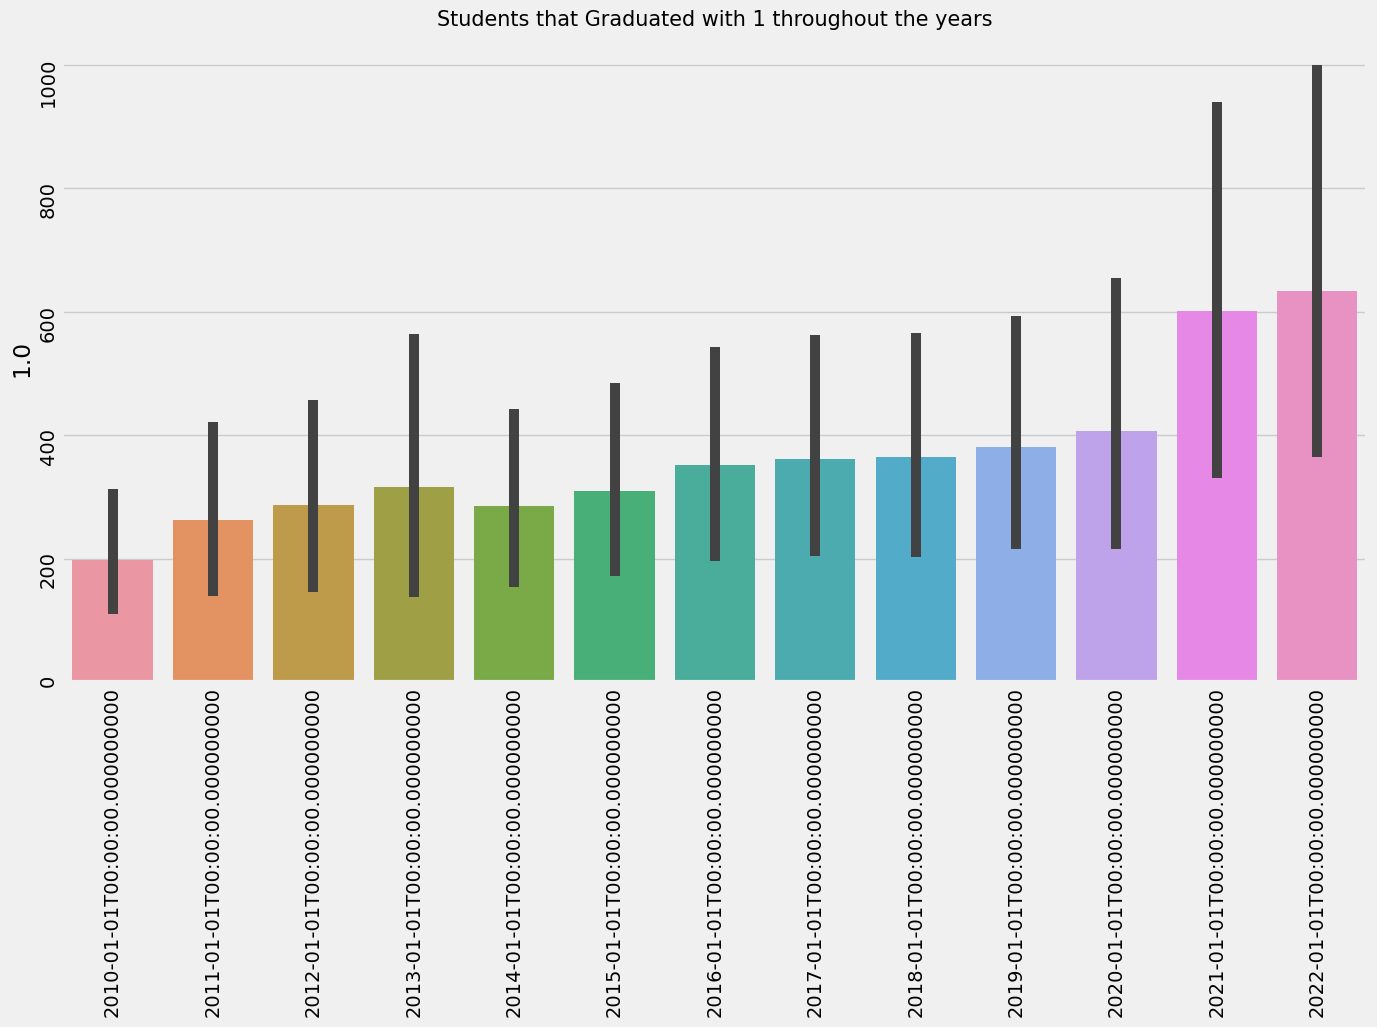

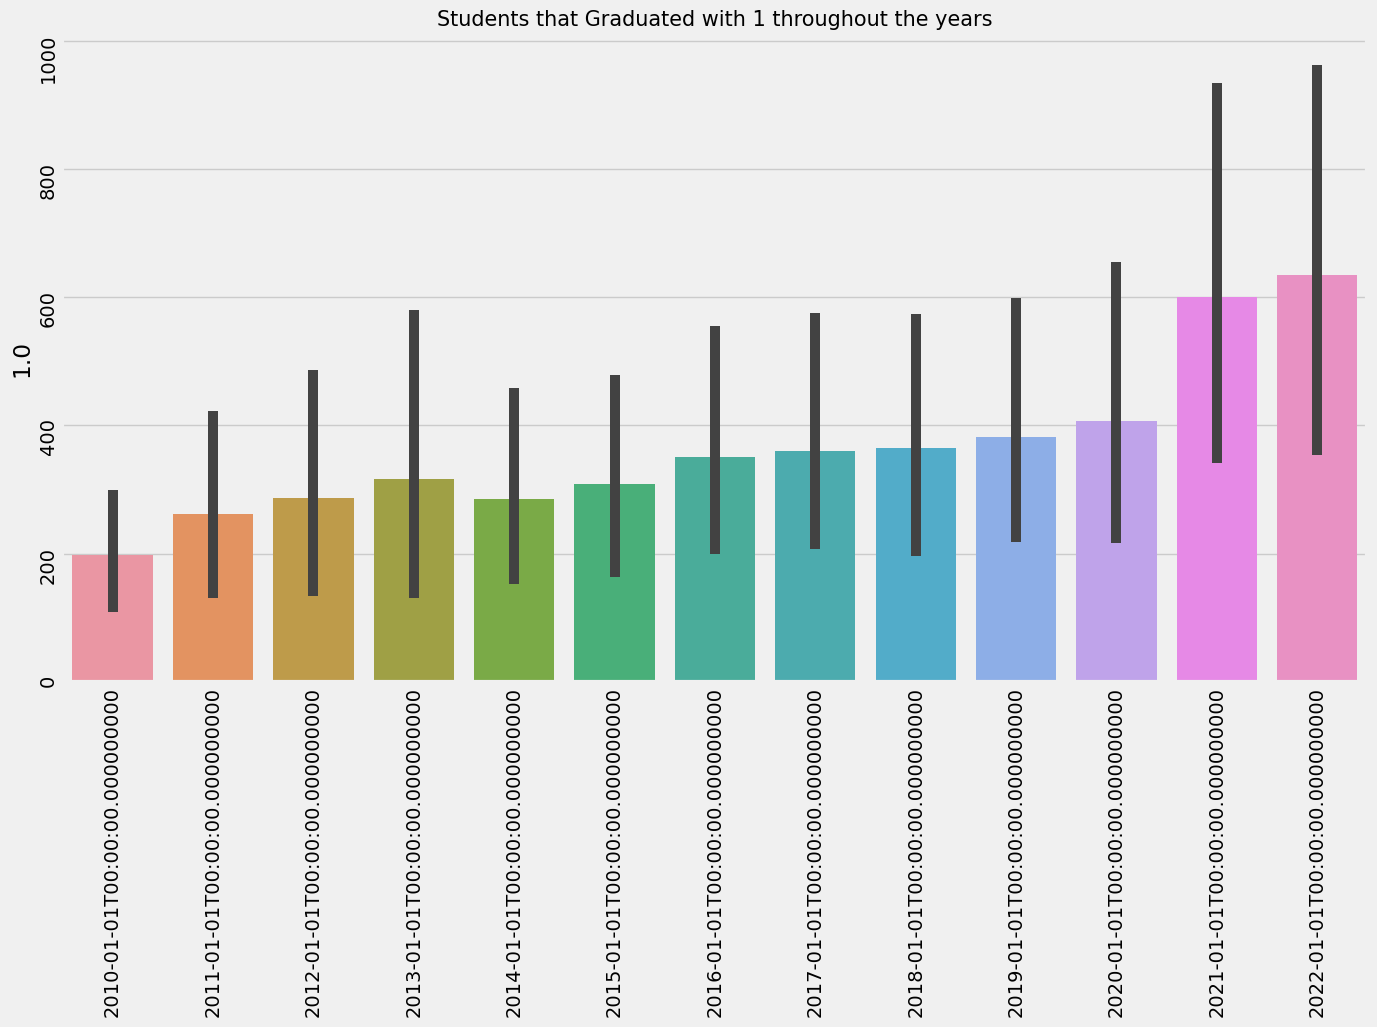

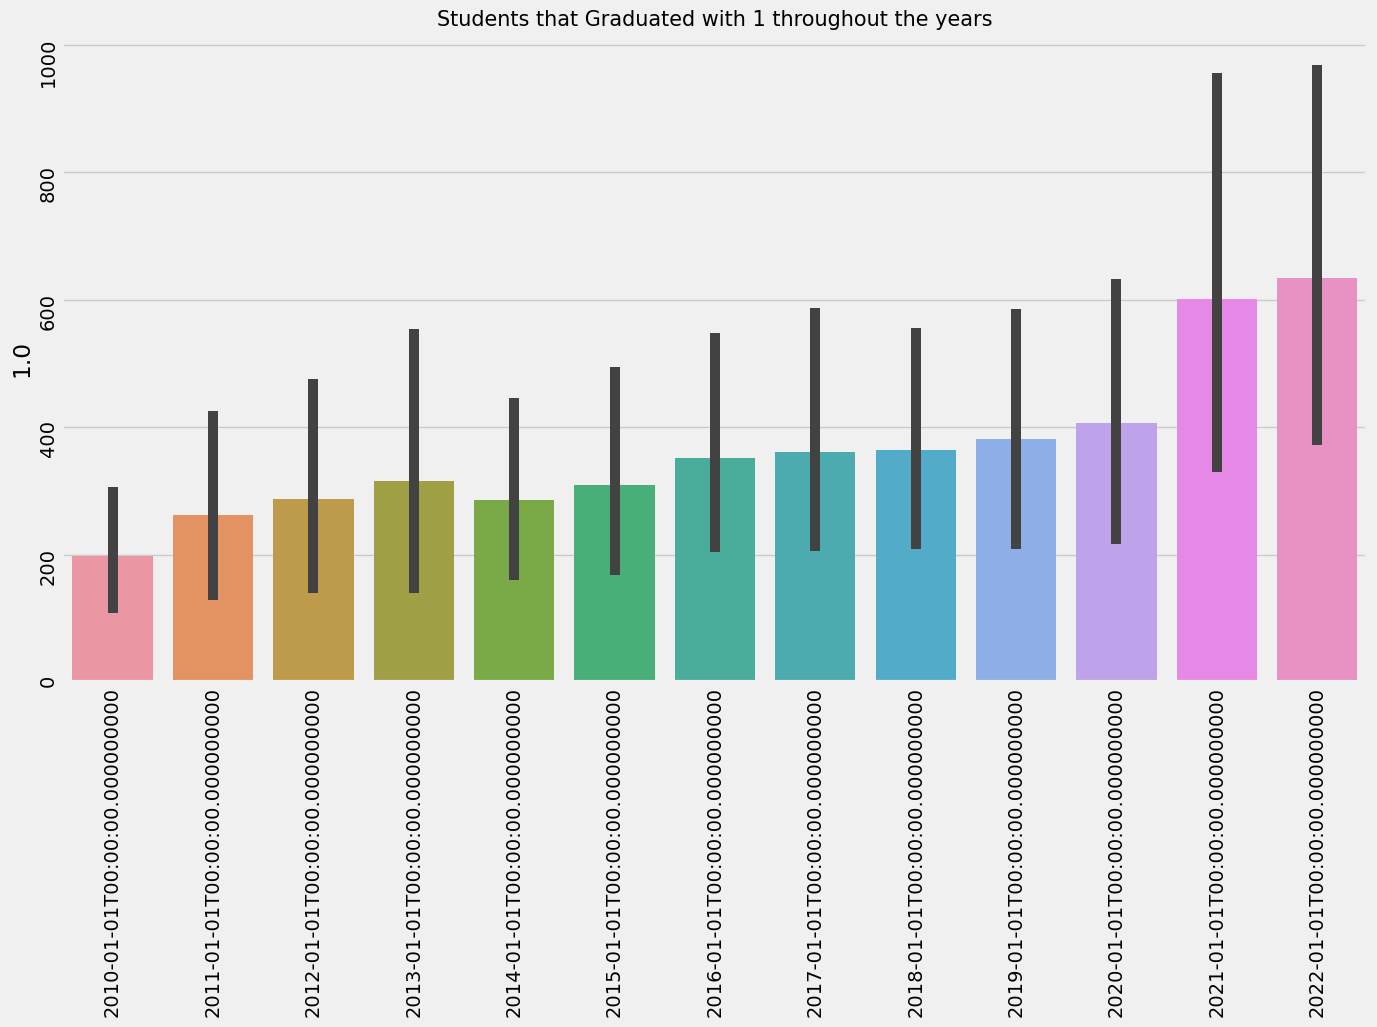

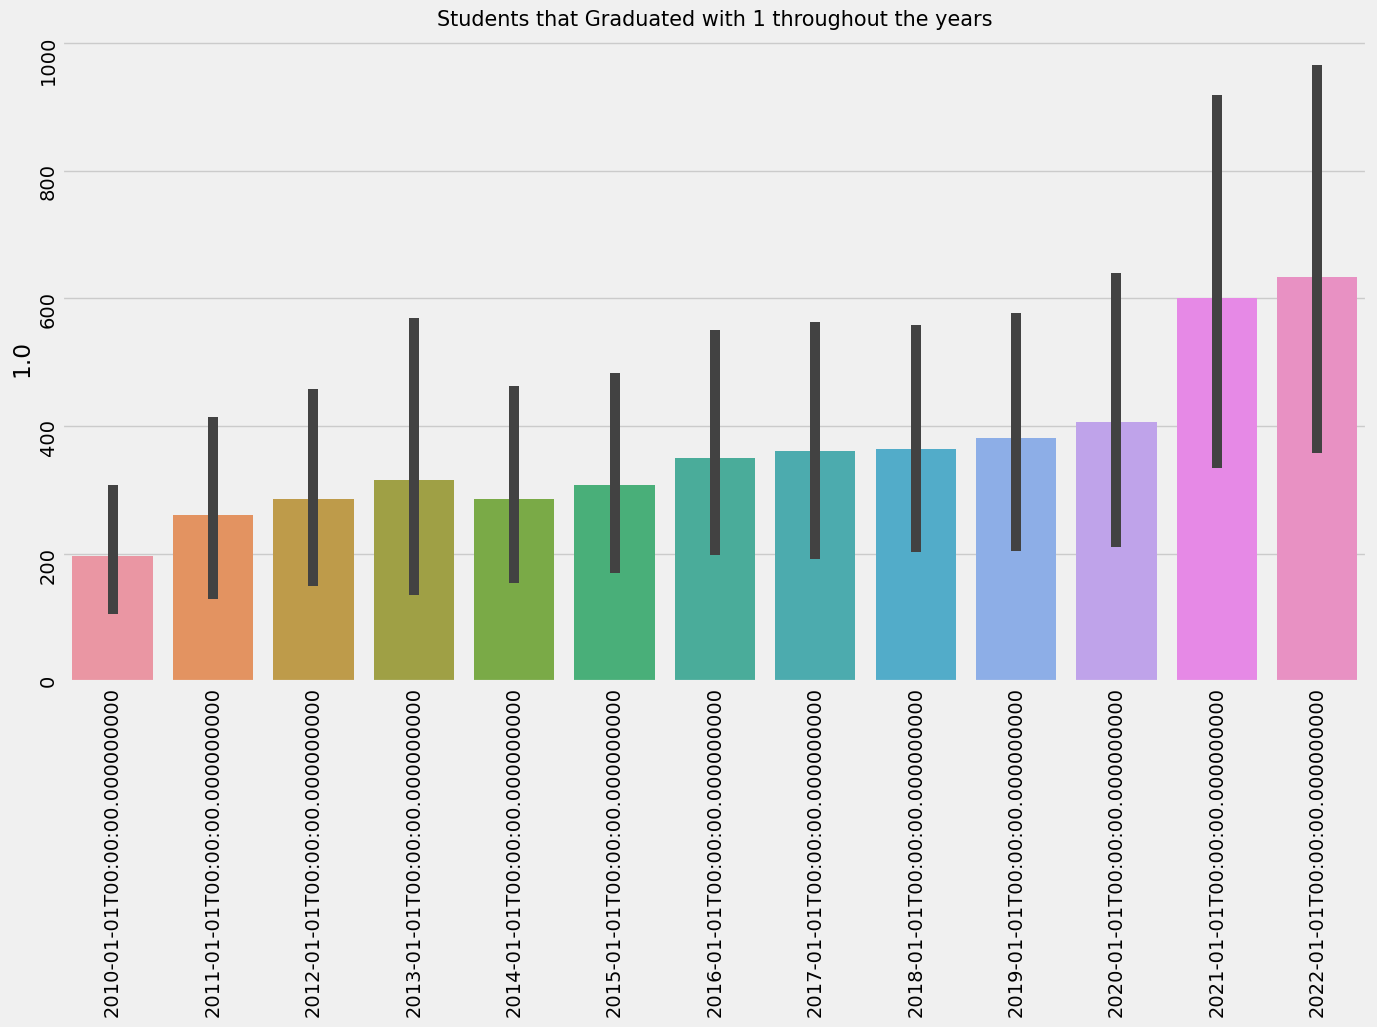

In [18]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x=noten_concat['year'], y=noten_concat['1.0']) # create countplot
f1.tick_params(axis=('both'), rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
#f1.set_ylabel("Students that Graduated with 1 throughout the years", fontsize = 10); # set label for y-axis
f1.set_title('Students that Graduated with 1 throughout the years', fontsize=15); # set title
plt.show()